In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

Reading Data

In [26]:
file_path= "/home/indira/Projects/Datasci/Multiple linear regression/FuelConsumption.csv"
df = pd.read_csv(file_path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Selecting features to use for regression.

In [27]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Scatter plot of Emission with respect to Engine size

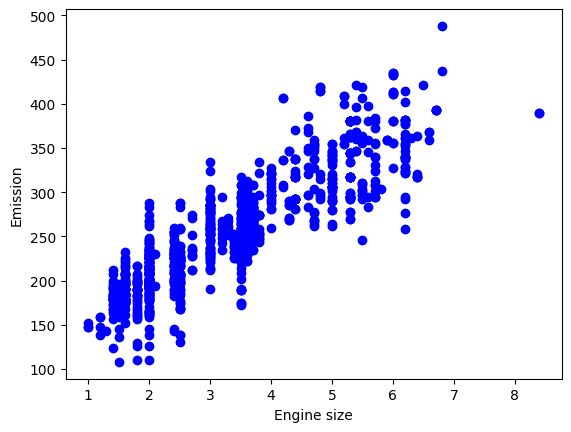

In [20]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Spliting train and test dataset into 80% and 20% respectively by creating mask. Mask function is created using np.random.rand() function.

In [30]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Train data disctribution visualization by scatter plot

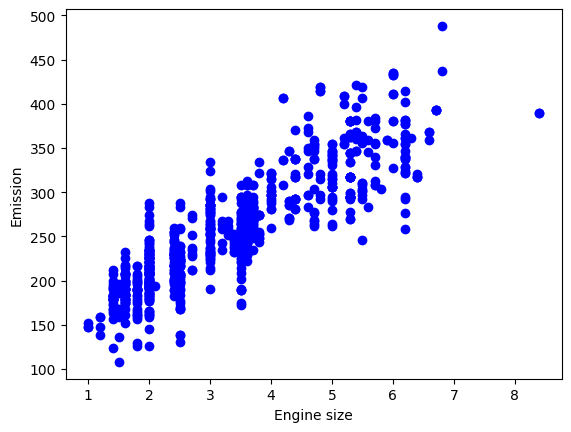

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

MULTIPLE REGRESSION MODEL

Here, more than one independent variables and present which is  called multiple linear regression. It is the extension of simple linear regression model.

Train set is used to fit the regression model

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x_train, y_train)
print ('Coefficients: ', regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients:  [[10.41503144  7.6901386   9.72363991]]
Intercept: [64.87240815]


PREDICTION

In [47]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_= regr.predict(x)
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 507.44
Variance score: 0.87


VARIANCE SCORE

Given y_ be the estimated target output, y be the correspodning correct output, and Var be the variance, then explained variance is estimated as:

explainedVariance(y,y_)=1-(Var{y-y_}/Var{y})

If it's 1.0 , it is the perfect prediction. Lower values indicates worse prediction.
